# imports

In [1]:
from pathlib import Path
import sys

current_dir = Path.cwd()
parent_dir = current_dir.parent
sys.path.append(str(parent_dir))

In [ ]:
from lib.auxilary import *
from lib.processing import *
from lib.segmentation import *
from lib.registration import *  


# getting started!
here we will install the TrailMap axon segmentation model if nesscary and create our expirement

In [2]:
exp_path = createExperiment("ding_lab_brain6_reg_optim5")
#exp_path = r"F:\axonAtlas2\experiments\UTSW_brain6_2025-10-31_13-27-47"


Ensured base experiments directory exists: 'f:\axonAtlas2\experiments'
Successfully created experiment folder: 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54'


<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


The folder 'TRAILMAP' was found in the current directory. Proceed!


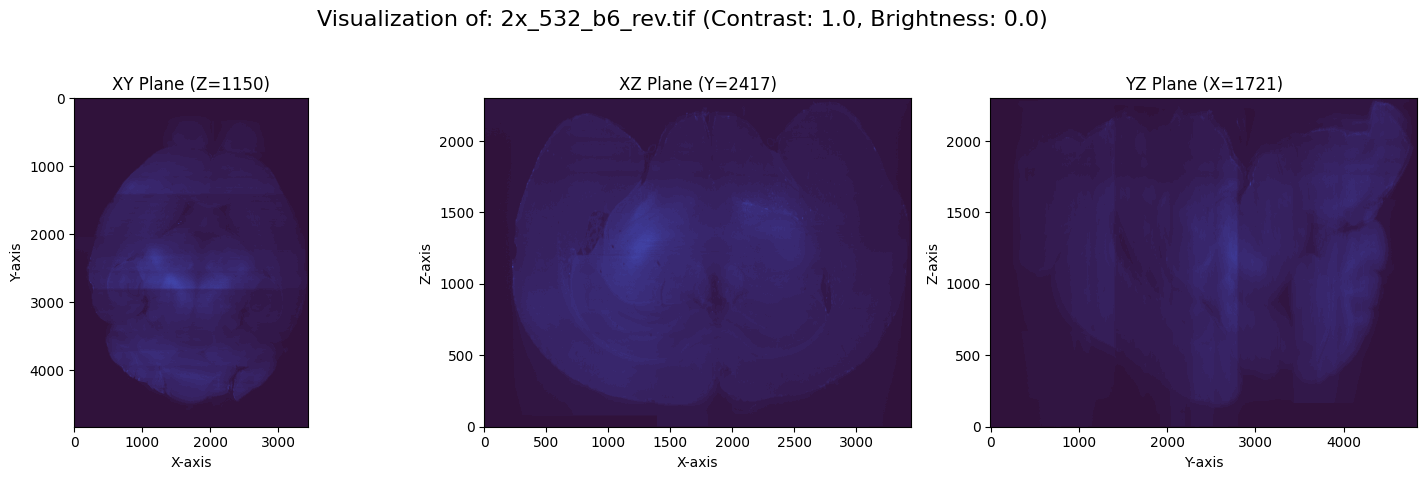

Successfully visualized 'F:\ding_lab_samples\2x_532_b6_rev.tif'.


In [3]:
check_trailmap()
axon_stack = r"F:\ding_lab_samples\2x_532_b6_rev.tif"
#autof_stack = r"F:\Brain 5 Lifecanvas SmartSPIM\1.6X\All_Channels\ch0_0.5xyz.tif"
tiffVisualize(axon_stack, views=3, colormap="turbo")
#cell_stack = r""



<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Generating mask (erosion=30)...
Saving to: f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\2x_532_b6_rev_mask.tif
Calculating global statistics for normalization...
  Range: 0.0 to 65535.0
  Saved slice 100/2300
  Saved slice 200/2300
  Saved slice 300/2300
  Saved slice 400/2300
  Saved slice 500/2300
  Saved slice 600/2300
  Saved slice 700/2300
  Saved slice 800/2300
  Saved slice 900/2300
  Saved slice 1000/2300
  Saved slice 1100/2300
  Saved slice 1200/2300
  Saved slice 1300/2300
  Saved slice 1400/2300
  Saved slice 1500/2300
  Saved slice 1600/2300
  Saved slice 1700/2300
  Saved slice 1800/2300
  Saved slice 1900/2300
  Saved slice 2000/2300
  Saved slice 2100/2300
  Saved slice 2200/2300
  Saved slice 2300/2300
Save complete.


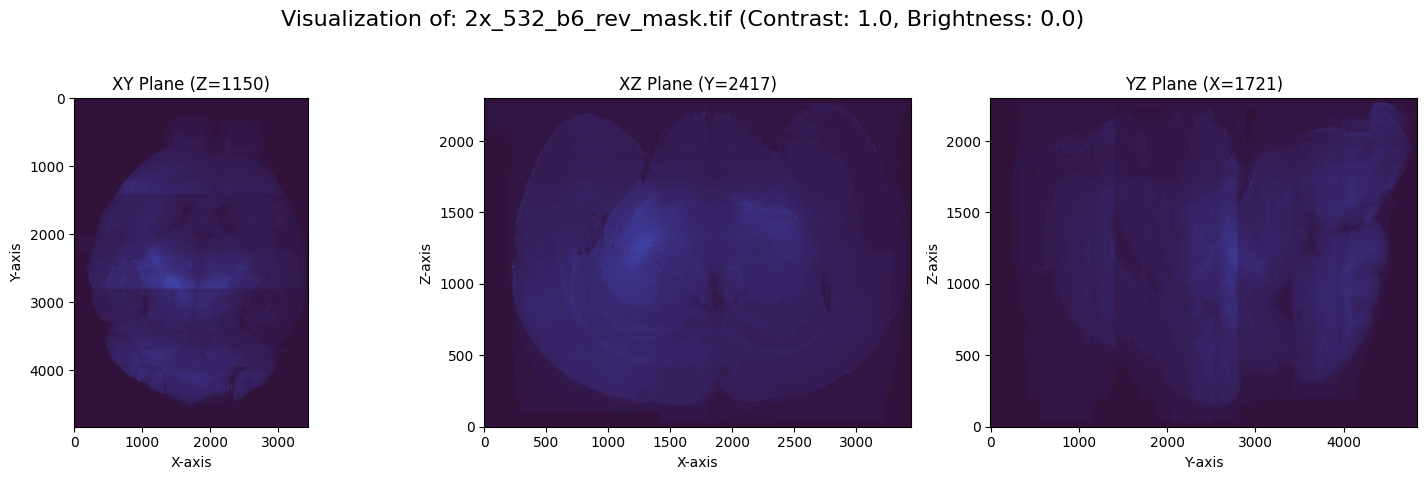

Successfully visualized 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\2x_532_b6_rev_mask.tif'.


In [4]:
surgical_mask_stack = surgical_mask(axon_stack, exp_path, erosion_iterations=30)
tiffVisualize(surgical_mask_stack, views=3, colormap="turbo")

In [5]:
#clahe_stack = CLAHE(surgical_mask_stack, output_dir=exp_path, clip_limit=2.0, kernel_size=(32,32,32))
#tiffVisualize(clahe_stack, views=3, colormap="turbo")

In [6]:
#g_blur_stack = gaussian_blur(clahe_stack, sigma=2, output_dir=exp_path, subtract_background=True)
#tiffVisualize(g_blur_stack, views=3, colormap="turbo")

# axon segmentation
here we will run trailmap and generate our axon segmentation masks

In [7]:
!pip install h5py==2.10.0
seg_axon_stack = axonSegment(surgical_mask_stack, exp_path)



--- Starting TRAILMAP Inference for '2x_532_b6_rev_mask.tif' ---
Created temporary directory: 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\trailmap_inference_temp'

Converting '2x_532_b6_rev_mask.tif' to frames folder...
Created output folder: 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\trailmap_inference_temp\2x_532_b6_rev_mask_folder'
Processing 2300 frames from 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\2x_532_b6_rev_mask.tif'...
Successfully saved all frames from 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\2x_532_b6_rev_mask.tif' to 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\trailmap_inference_temp\2x_532_b6_rev_mask_folder'.

Running TRAILMAP segmentation command...
Command executed: 'python TRAILMAP/segment_brain_batch.py f:/axonAtlas2/experiments/ding_lab_brain6_reg_optim5_2026-01-02_15-47-54/trailmap_inference_temp/2x_532_b6_rev

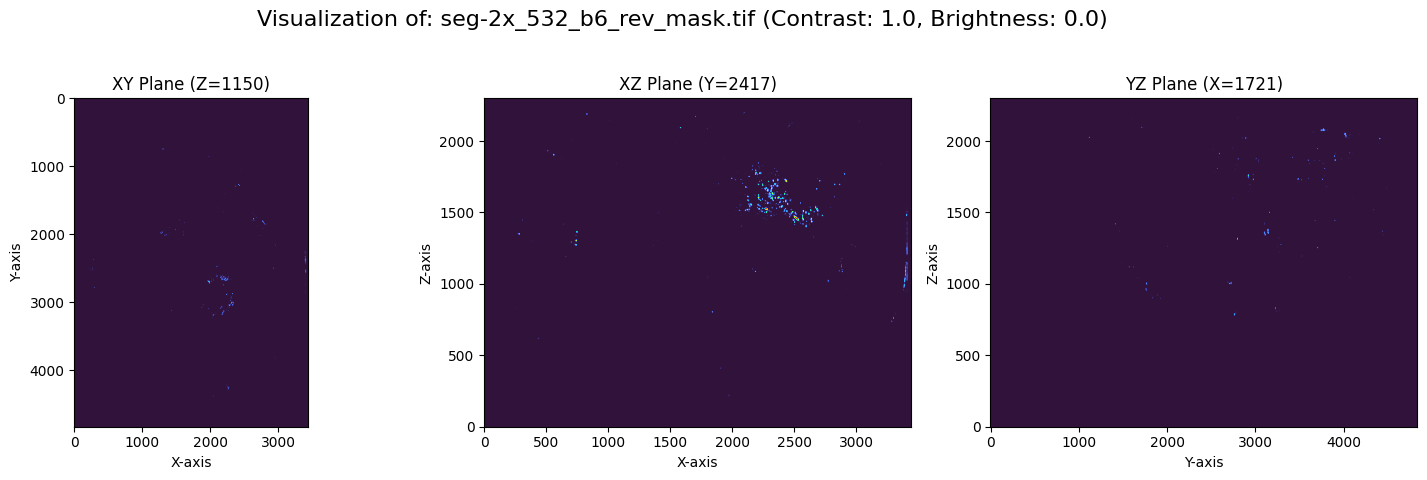

Successfully visualized 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\seg-2x_532_b6_rev_mask.tif'.


In [8]:
tiffVisualize(seg_axon_stack, views=3, colormap="turbo")

<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Downscaling F:\ding_lab_samples\2x_532_b6_rev.tif...
Saving to: f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\2x_532_b6_rev_down.tif
  Saved slice 100/1150
  Saved slice 200/1150
  Saved slice 300/1150
  Saved slice 400/1150
  Saved slice 500/1150
  Saved slice 600/1150
  Saved slice 700/1150
  Saved slice 800/1150
  Saved slice 900/1150
  Saved slice 1000/1150
  Saved slice 1100/1150
Save complete.
Downscaling f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\seg-2x_532_b6_rev_mask.tif...
Saving to: f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\seg-2x_532_b6_rev_mask_down.tif
  Saved slice 100/1150
  Saved slice 200/1150
  Saved slice 300/1150
  Saved slice 400/1150
  Saved slice 500/1150
  Saved slice 600/1150
  Saved slice 700/1150
  Saved slice 800/1150
  Saved slice 900/1150
  Saved slice 1000/1150
  Saved slice 1100/1150
Save complete.


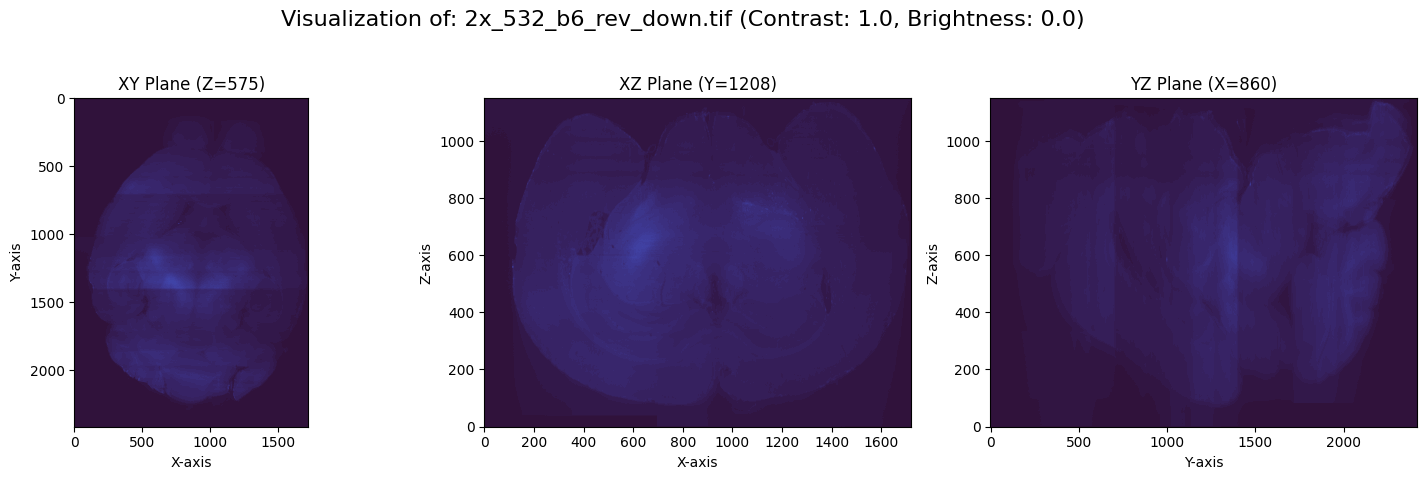

Successfully visualized 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\2x_532_b6_rev_down.tif'.


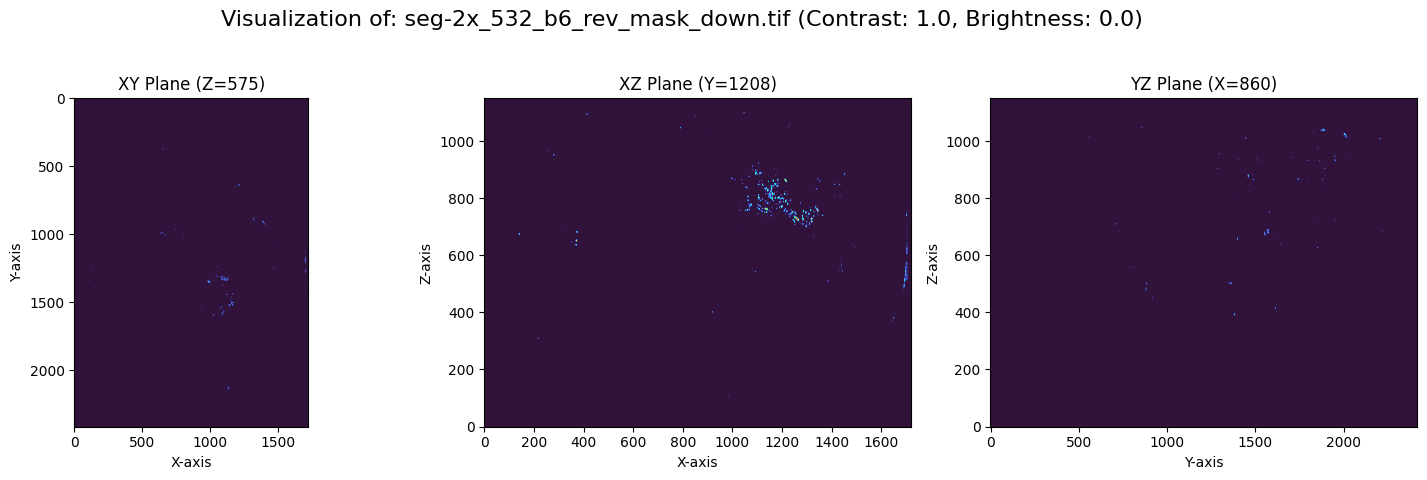

Successfully visualized 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\seg-2x_532_b6_rev_mask_down.tif'.


In [9]:
d_scaled_axon_stack = downscale(axon_stack, scale_factor=0.5, output_dir=exp_path)
d_scaled_seg_stack = downscale(seg_axon_stack, scale_factor=0.5, output_dir=exp_path)
tiffVisualize(d_scaled_axon_stack, views=3, colormap="turbo")
tiffVisualize(d_scaled_seg_stack, views=3, colormap="turbo")

# composition
here we binarize our segmentation masks and compose them with the raw axonal data to prepare for registration|

Binarizing 1150 frames...
  Processed 100...
  Processed 200...
  Processed 300...
  Processed 400...
  Processed 500...
  Processed 600...
  Processed 700...
  Processed 800...
  Processed 900...
  Processed 1000...
  Processed 1100...
Saving to: f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\seg-2x_532_b6_rev_mask_down_bin.tif
  Saved slice 100/1150
  Saved slice 200/1150
  Saved slice 300/1150
  Saved slice 400/1150
  Saved slice 500/1150
  Saved slice 600/1150
  Saved slice 700/1150
  Saved slice 800/1150
  Saved slice 900/1150
  Saved slice 1000/1150
  Saved slice 1100/1150
Save complete.
Saving to: f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\2x_532_b6_rev_down_comp.tif
  Saved slice 100/1150
  Saved slice 200/1150
  Saved slice 300/1150
  Saved slice 400/1150
  Saved slice 500/1150
  Saved slice 600/1150
  Saved slice 700/1150
  Saved slice 800/1150
  Saved slice 900/1150
  Saved slice 1000/1150
  Saved slice 1100/1150
Save c

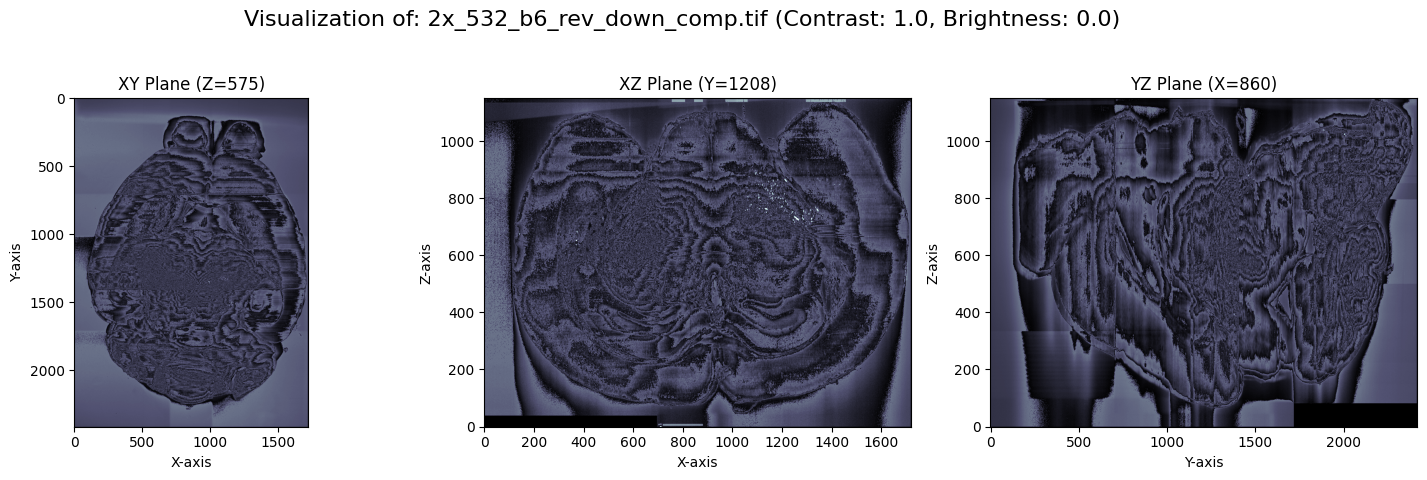

Successfully visualized 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\2x_532_b6_rev_down_comp.tif'.


In [10]:
binary = binarize(d_scaled_seg_stack, exp_path)
axon_proc = dimCompose(binary, d_scaled_axon_stack, exp_path, dim_factor = 0.5)
tiffVisualize(axon_proc, views=3, colormap="bone")

# registration
here we register our autoflourescence and composed data to the allen mouse brain atlas

In [11]:
# ding lab sar
# utsw sal
reg_path = Registration(autof_path=axon_proc, v1=10, v2=10, v3=10, orientation="sar", output_dir=exp_path, atlas="allen_mouse_25um")
#reg_path = r"D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\registration"

Constructed brainreg command: brainreg "f:/axonAtlas2/experiments/ding_lab_brain6_reg_optim5_2026-01-02_15-47-54/2x_532_b6_rev_down_comp.tif" "f:/axonAtlas2/experiments/ding_lab_brain6_reg_optim5_2026-01-02_15-47-54/registration" --atlas allen_mouse_25um -v 10 10 10 --orientation sar --n-free-cpus 8 --brain_geometry full --pre-processing default
Brainreg command executed successfully.


['f:\\axonAtlas2\\experiments\\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\\registration\\downsampled.tiff', 'f:\\axonAtlas2\\experiments\\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\\registration\\registered_atlas.tiff', None, 'f:\\axonAtlas2\\experiments\\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\\registration\\downsampled_standard.tiff', None]


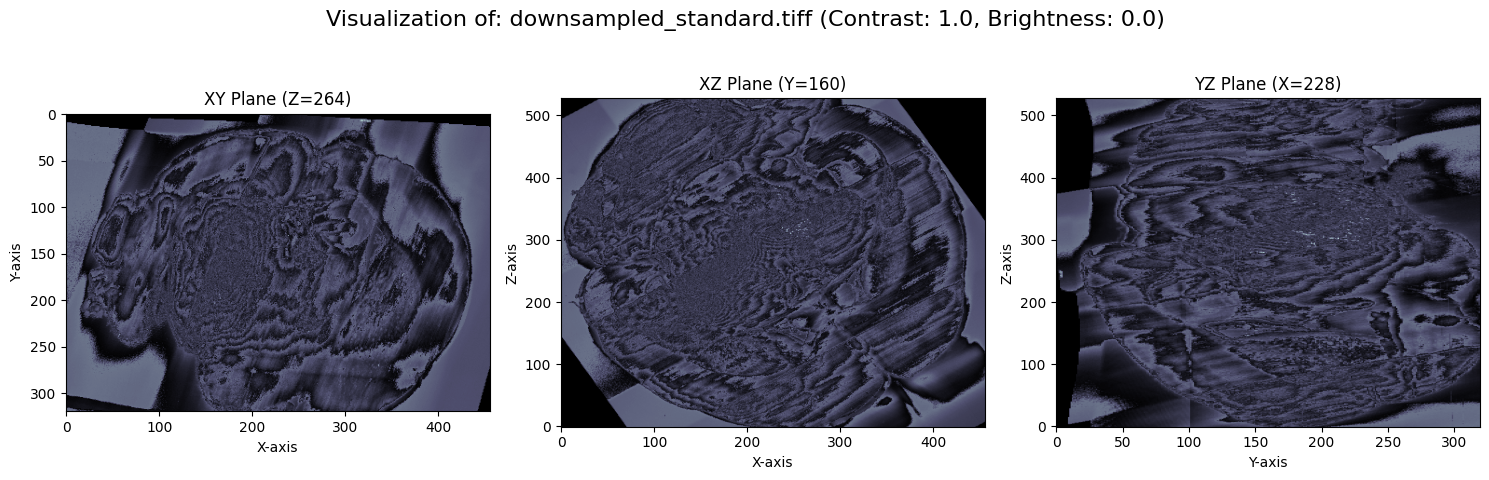

Successfully visualized 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\registration\downsampled_standard.tiff'.


In [12]:
reg_list = regExtract(reg_path)
print(reg_list)
downsampled_standard_autof = reg_list[3]
tiffVisualize(downsampled_standard_autof, views=3, colormap="bone")

# postprocessing
here we use thresholding to extract the exon segmentation masks in the atlas space

Loading: f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\registration\downsampled_standard.tiff
Saving to: f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\downsampled_standard_skel.tif
  Saved slice 100/528
  Saved slice 200/528
  Saved slice 300/528
  Saved slice 400/528
  Saved slice 500/528
Save complete.


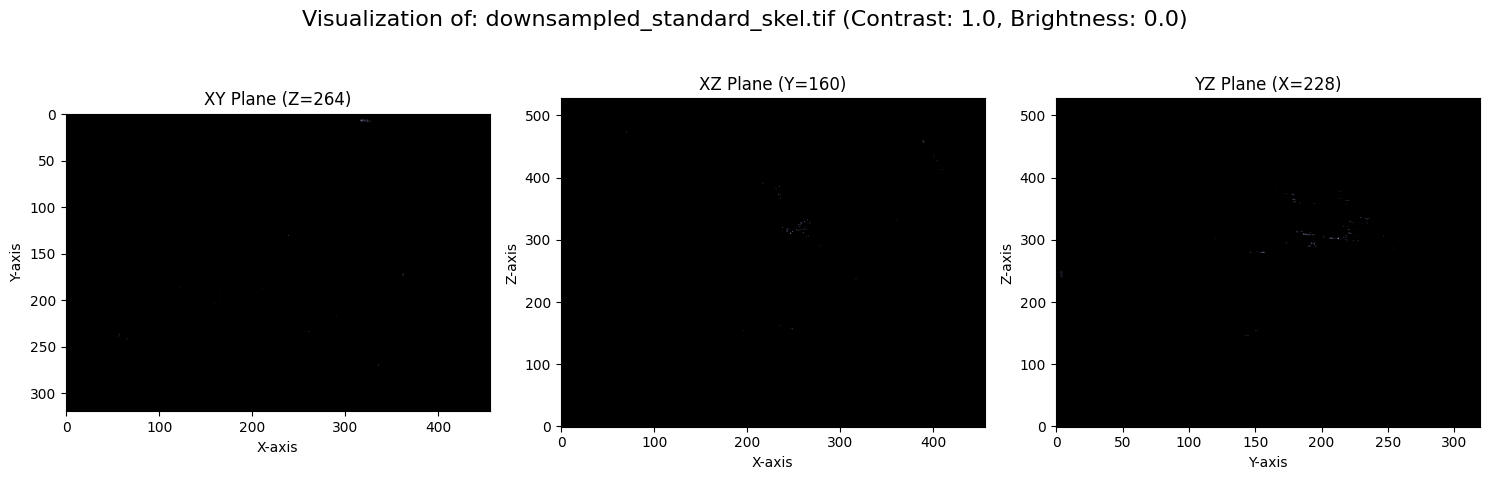

Successfully visualized 'f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54\downsampled_standard_skel.tif'.


In [13]:
downsampled_standard_autof_skeleton = skeletonize2(downsampled_standard_autof, exp_path)
tiffVisualize(downsampled_standard_autof_skeleton, views=3, colormap="bone")


In [14]:
arrayStats(downsampled_standard_autof_skeleton)

Shape: (528, 320, 456), Dtype: uint8
Min: 0, Max: 254
Mean: 0.03, Non-zero: 39351


# congrats! you finished part1 switch from the trailmmap_env conda enviorment to the BrainRender enviorment and then move over to the visualization notebook to turn these into 3D

In [15]:
print(exp_path)

f:\axonAtlas2\experiments\ding_lab_brain6_reg_optim5_2026-01-02_15-47-54
